<a href="https://colab.research.google.com/github/WelfLowe/ML4developers/blob/main/3-Numerical_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Load necessary libraries.

In [39]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

Load data:

In [40]:
housing_data = fetch_california_housing()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Target'] = housing_data.target
print(df.columns)


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


1. MedInc: Median income in the block.
2. HouseAge: Median house age in the block.
3. AveRooms: Average number of rooms per household.
4. AveBedrms: Average number of bedrooms per household.
5. Population: Block population.
6. AveOccup: Average number of occupants per household.
7. Latitude: Block latitude.
8. Longitude: Block longitude.
9. Target: Median house value (in hundreds of thousands of dollars).

No missing datapoints:

In [41]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


Select the 'AveRooms' and 'HouseAge' features as predictors:

In [42]:
X = pd.DataFrame(np.c_[df['AveOccup'], df['AveRooms']], columns = ['AveOccup','AveRooms'])
Y = df['Target']
X

,AveOccup,AveRooms
0,2.555556,6.984127
1,2.109842,6.238137
2,2.802260,8.288136
3,2.547945,5.817352
4,2.181467,6.281853
...,...,...
20635,2.560606,5.045455
20636,3.122807,6.114035
20637,2.325635,5.205543
20638,2.123209,5.329513


from matplotlib import pyplot as plt
X['AveOccup'].plot(kind='hist', bins=20, title='AveOccup')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['AveRooms'].plot(kind='hist', bins=20, title='AveRooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X.plot(kind='scatter', x='AveOccup', y='AveRooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X['AveOccup'].plot(kind='line', figsize=(8, 4), title='AveOccup')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X['AveRooms'].plot(kind='line', figsize=(8, 4), title='AveRooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [43]:
X.min(axis=0)

,0
AveOccup,0.692308
AveRooms,0.846154


In [44]:
X.max(axis=0)

,0
AveOccup,1243.333333
AveRooms,141.909091


Split training and test data:

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


Fit the model:

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

Evaluate the model using MSE and R-Squared.

- MSE represents the residual error which is nothing but sum of squared difference between actual values and the predicted / estimated values divided by total number of records.

- R-Squared represents the fraction of variance captured by the regression model.

- The disadvantage of using MSE is that the value of MSE varies based on whether the values of response variable is scaled or not. If scaled, MSE will be lower than the unscaled values.

In [47]:
# model evaluation for training set
y_train_predict = lr_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.288858514362327
R2 score is 0.023154083200405018


The model performance for testing set
--------------------------------------
MSE is 1.3453470587752192
R2 score is 0.024887570929574276


In [48]:
def visualize(X, Y, model):
  x= X['AveOccup']
  y= X['AveRooms']
  z = Y

  N = 100
  x_pred = np.linspace(0.5, 1234, N)   # N values in the range of LSTAT
  y_pred = np.linspace(0.5, 145., N)  # N values in the range of RM
  xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
  model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
  model_vizz = pd.DataFrame(model_viz, columns = ['AveOccup','AveRooms'])

  predicted = model.predict(model_vizz)
  zz_pred = predicted.reshape(N,N)

  plt.style.use('default')

  fig = plt.figure(figsize=(12, 4))

  ax1 = fig.add_subplot(131, projection='3d')
  ax2 = fig.add_subplot(132, projection='3d')
  ax3 = fig.add_subplot(133, projection='3d')

  axes = [ax1, ax2, ax3]

  for ax in axes:
      surf = ax.plot_surface(xx_pred, yy_pred, zz_pred, cmap=cm.coolwarm, linewidth=0, antialiased=False)
      ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.35)

      ax.set_xlabel('AveOccup')
      ax.set_ylabel('AveRooms')
      ax.set_zlabel('Target')

  ax1.view_init(elev=28, azim=120)
  ax2.view_init(elev=4, azim=114)
  ax3.view_init(elev=60, azim=165)
  fig.tight_layout(pad=2.5)
  fig.colorbar(surf, shrink=0.75, pad=0.15)


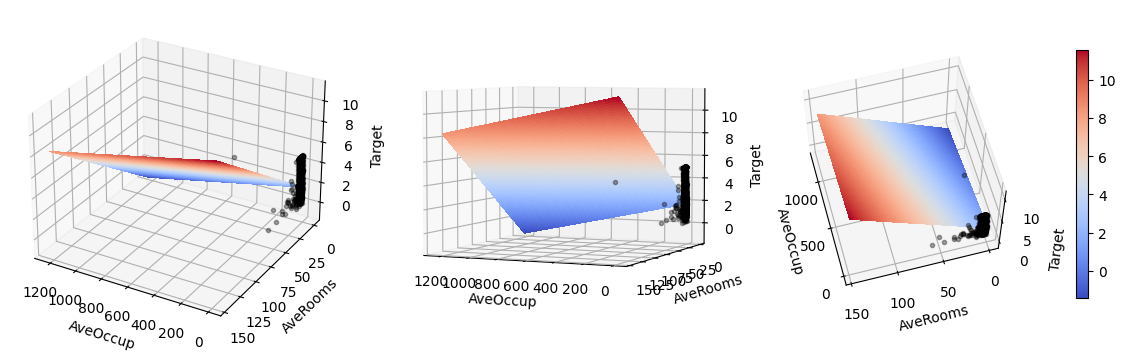

In [49]:
visualize(X_test, Y_test, lr_model)

# KNN Regression

KNN regression is an alternative approach to numerical regression.

In [50]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [51]:
# model evaluation for training set
y_train_predict = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 0.7482080610322454
R2 score is 0.4329214718362615


The model performance for testing set
--------------------------------------
MSE is 1.1357291369449998
R2 score is 0.17681940115830574


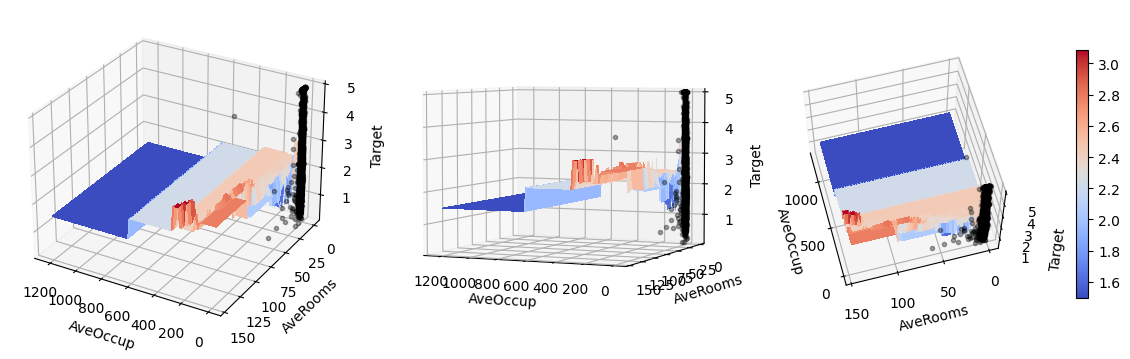

In [52]:
visualize(X_test, Y_test, knn_model)

# Advanced: Feature selection

Again all features and their values:

In [54]:
XX = df.drop('Target',axis=1)
XX

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


All features give a certain $R^2$ value (in training data in linear regressin).

In [55]:
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, Y, test_size = 0.2, random_state=5)

In [56]:
def train_and_test(XX_train, XX_test, YY_train, YY_test):
  lr_model = LinearRegression()
  lr_model.fit(XX_train, YY_train)
  y_test_predict = lr_model.predict(XX_test)
  return r2_score(YY_test, y_test_predict)
  #return 1/mean_squared_error(YY_test, y_test_predict)


In [57]:
train_and_test(XX_train, XX_test, YY_train, YY_test)

0.6112568432827635

In [65]:
import math
math.sqrt(0.6112568432827635)

0.7818291650244084

Less could be more, i.e., fewer features could lead to a better model. Feature selection tries to select the most relevant ones. This could be done in many ways. Two step-by-step, recursive approaches **eliminate** features from the full feature set and **agglomerate** features to the empty set, respectively.

Recursive elimination of features one by one until the $R^2$ statistics doesn't increase.

In [58]:
def eliminate(XX_train, XX_test, verbose):
  drop_col = ''
  r2_max = train_and_test(XX_train, XX_test, YY_train, YY_test)
  for (colname, _) in XX_train.items():
    XX_train_ = XX_train.drop(colname,axis=1)
    XX_test_ = XX_test.drop(colname,axis=1)
    r2 = train_and_test(XX_train_, XX_test_, YY_train, YY_test)
    if r2 >= r2_max:
      if verbose:
        print("maybe remove ",colname)
        print("R2 =", r2)
      drop_col = colname
      r2_max = r2
  if drop_col != '':
    if verbose:
      print("remove ",colname)
    XX_train_ = XX_train.drop(drop_col,axis=1)
    XX_test_ = XX_test.drop(drop_col,axis=1)
    res = eliminate(XX_train_, XX_test_, verbose)
  else:
    res = list(XX_train.columns)
  return res

In [59]:
features = eliminate(XX_train, XX_test, False)
print(features, len(features))

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude'] 7


Alternatively, by starting with the empty list of features and adding features as long as the $R^2$ statistics increases.

In [60]:
def agglomerate(selected_names, verbose):
  add_col = ''
  r2_max = 0
  for (colname, _) in XX_train.items():
    if not colname in selected_names:
      selected_names_=selected_names.copy()
      selected_names_.append(colname)
      XX_train_ = XX_train[selected_names_]
      XX_test_ = XX_test[selected_names_]
      r2 = train_and_test(XX_train_, XX_test_, YY_train, YY_test)
      if r2 >= r2_max:
        if verbose:
          print("maybe add ",colname)
          print("R2 =", r2)
        add_col = colname
        r2_max = r2
  if add_col != '':
    if verbose:
      print("add ",colname)
    selected_names_=selected_names.copy()
    selected_names_.append(add_col)
    res = agglomerate(selected_names_, verbose)
  else:
    res = selected_names
  return res

In [61]:
features = agglomerate([], False)
print(features, len(features))

['MedInc', 'HouseAge', 'Latitude', 'Longitude', 'AveBedrms', 'AveRooms', 'Population', 'AveOccup'] 8
